In [1]:
%load_ext autoreload
%autoreload 2

In [38]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import nnfs
import math
import random

from nnfs.datasets import spiral_data, vertical_data, sine_data

from mnist import download_data, create_mnist_dataset
from model import Model
from layers import Dense, Dropout
from activations import ReLU, SoftMax, Sigmoid, Linear
from losses import CategoricalCrossEntropy, Softmax_CategoricalCrossentropy, BinaryCrossentropy, MeanAbsoluteError, MeanSquaredError
from optimizers import SGD, AdaGrad, RMSProp, Adam
from metrics import Accuracy_Regression, Accuracy_Categorical

In [3]:
nnfs.init()

## CH 19: Real Dataset

In [5]:
labels = os.listdir("fashion_mnist_images/train")
print(labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [8]:
files = os.listdir("fashion_mnist_images/train/0")
print(files[:10])
print(len(files))

['0000.png', '0001.png', '0002.png', '0003.png', '0004.png', '0005.png', '0006.png', '0007.png', '0008.png', '0009.png']
6000


In [21]:
image_data = cv2.imread("fashion_mnist_images/train/7/0002.png", cv2.IMREAD_UNCHANGED)
image_data.shape

(28, 28)

In [22]:
np.set_printoptions(linewidth=200)
print(image_data[:,:])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0  49 135 182 150  59   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  78 255 220 21

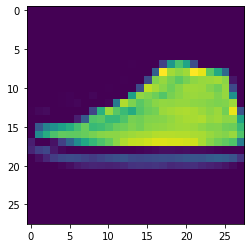

In [23]:
plt.imshow(image_data)
plt.show()

In [46]:
X, y, X_test, y_test = create_mnist_dataset('fashion_mnist_images')
print(X.shape)
print(y.shape)

print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [47]:
# To float
X = X.astype(np.float32) 

# Normalize (-1,1)
X -= 127.5
X /= 127.5

X_test = (X_test.astype(np.float32) - 127.5) / 127.5

In [49]:
print(X.min(), X.max())

-1.0 1.0


In [50]:
# Reshape to flattened vectors
X = X.reshape(X.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
print(X.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [51]:
# Shuffle
keys = np.array(range(X.shape[0]))
np.random.shuffle(keys)

X = X[keys]
y = y[keys]

In [62]:
model = Model()
model.add(Dense(X.shape[1], 64))
model.add(ReLU())
model.add(Dense(64, 64))
model.add(ReLU())
model.add(Dense(64, 10))
model.add(SoftMax())

In [63]:
model.set(loss=CategoricalCrossEntropy(), optimizer=Adam(decay=5e-5), accuracy=Accuracy_Categorical())

In [64]:
model.finalize()

In [65]:
model.train(X, y, validation_data=(X_test, y_test), batch_size=128, epochs=5, print_every=100)


epoch: 1
step: 0, acc: 0.117, loss: 2.3027, data_loss: 2.3027, reg_loss: 0.0000, lr: 0.001
step: 100, acc: 0.703, loss: 0.6716, data_loss: 0.6716, reg_loss: 0.0000, lr: 0.0009950248756218907
step: 200, acc: 0.805, loss: 0.5401, data_loss: 0.5401, reg_loss: 0.0000, lr: 0.0009900990099009901
step: 300, acc: 0.805, loss: 0.6193, data_loss: 0.6193, reg_loss: 0.0000, lr: 0.0009852216748768474
step: 400, acc: 0.797, loss: 0.4953, data_loss: 0.4953, reg_loss: 0.0000, lr: 0.000980392156862745
step: 468, acc: 0.844, loss: 0.3934, data_loss: 0.3934, reg_loss: 0.0000, lr: 0.0009771350400625367

training acc: 0.723, loss: 0.7460, data_loss: 0.7460, reg_loss: 0.0000, lr: 0.0009771350400625367

epoch: 2
step: 0, acc: 0.844, loss: 0.4561, data_loss: 0.4561, reg_loss: 0.0000, lr: 0.0009770873027505008
step: 100, acc: 0.797, loss: 0.4828, data_loss: 0.4828, reg_loss: 0.0000, lr: 0.000972337012008362
step: 200, acc: 0.875, loss: 0.3508, data_loss: 0.3508, reg_loss: 0.0000, lr: 0.0009676326866321544
ste